In [1]:
pip install snha4py

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip show snha4py

Name: snha4py
Version: 0.0.8
Summary: St. Nicholas House algorithm for Python
Home-page: https://github.com/thake93/snha4py
Author: Tim Hake
Author-email: timhake@icloud.com
License: MIT License
Location: /opt/anaconda3/lib/python3.12/site-packages
Requires: igraph, matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
from snha4py.Snha import Snha
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

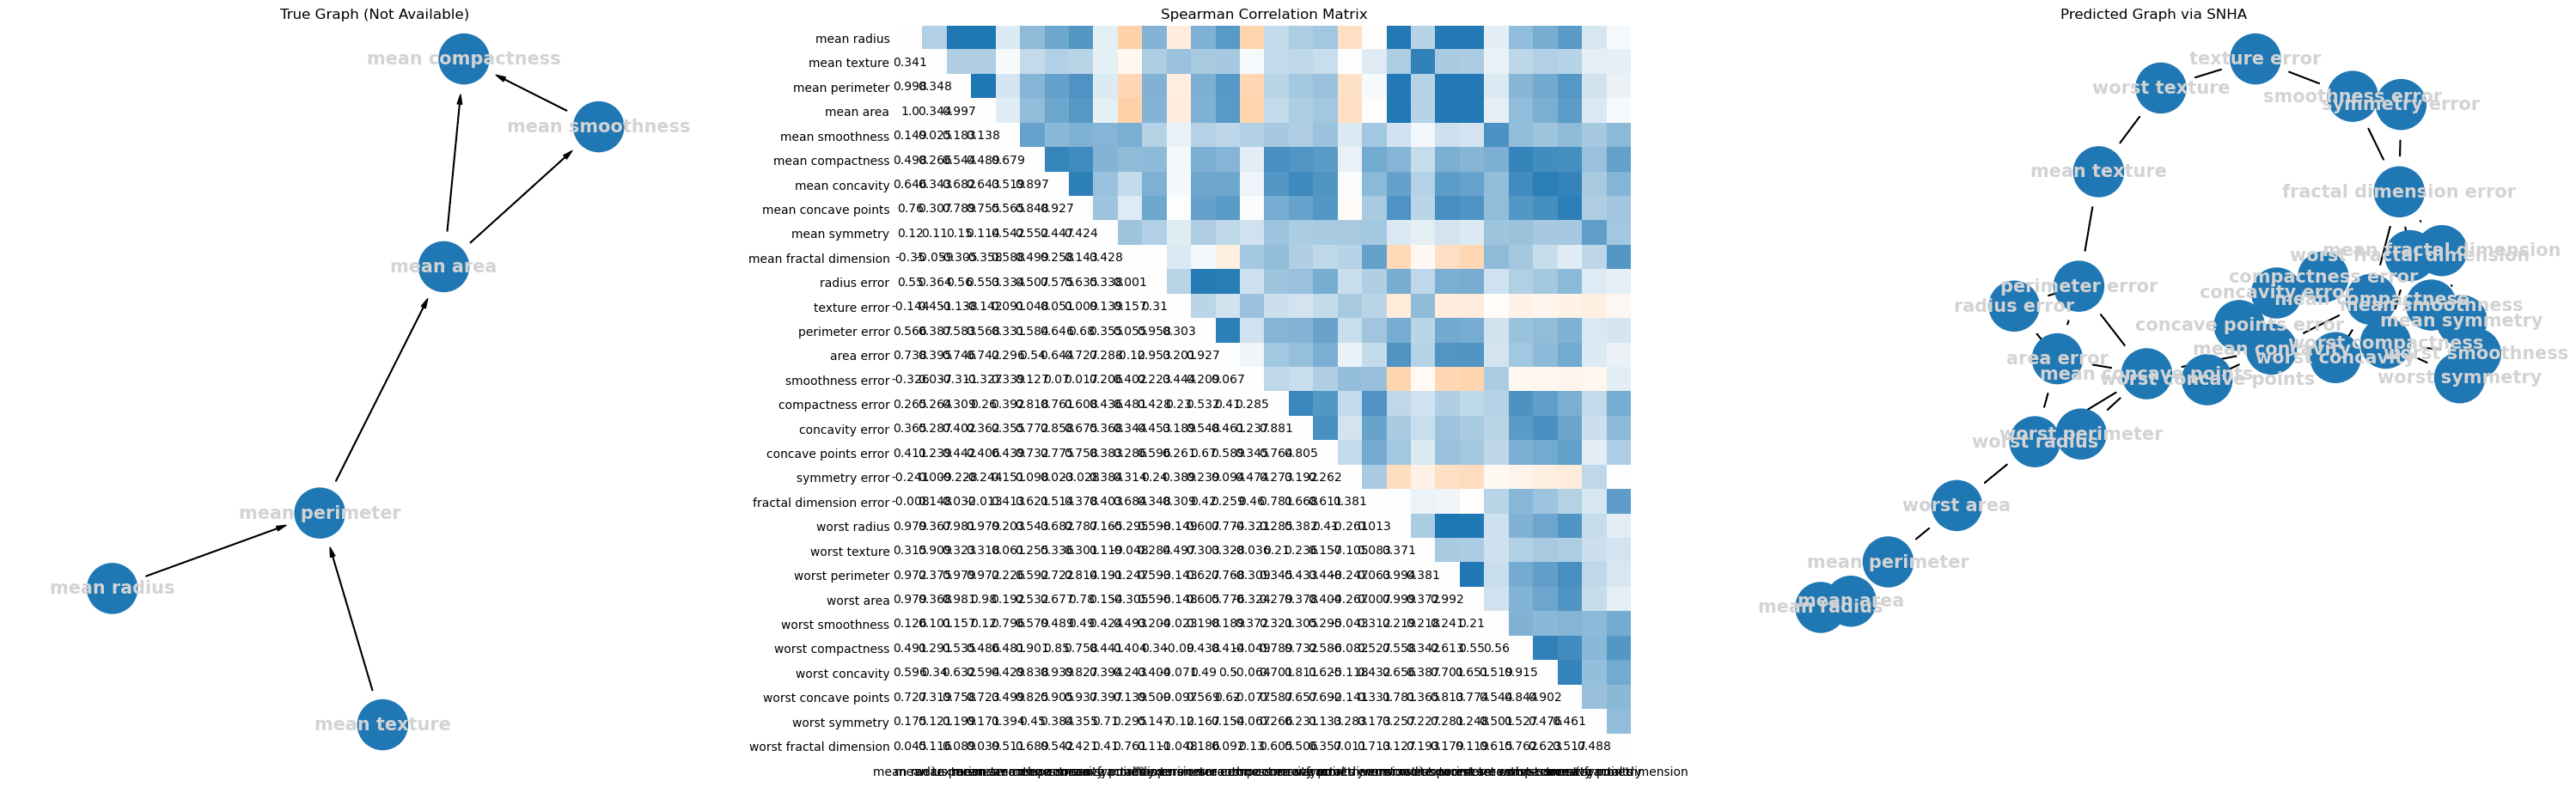

In [4]:

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Initialize SNHA
s = Snha()
s.new_graph()

# SET THE DATA
s.data = df  # ← Required so st_nich_alg() can access it

# Compute correlation matrix
s.comp_corr(df, method='spearman')

# Run the SNHA algorithm
s.st_nich_alg()

# Plot
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
s.plot_graph(pred=False, ax=ax[0])        # No true graph in real dataset
s.plot_corr(ax=ax[1])                     # Correlation matrix
s.plot_graph(ax=ax[2])                    # SNHA graph

ax[0].set_title('True Graph (Not Available)')
ax[1].set_title('Spearman Correlation Matrix')
ax[2].set_title('Predicted Graph via SNHA')

plt.savefig('snha_output_graphs.png')
plt.show()

Graph has 30 nodes and 34 edges.


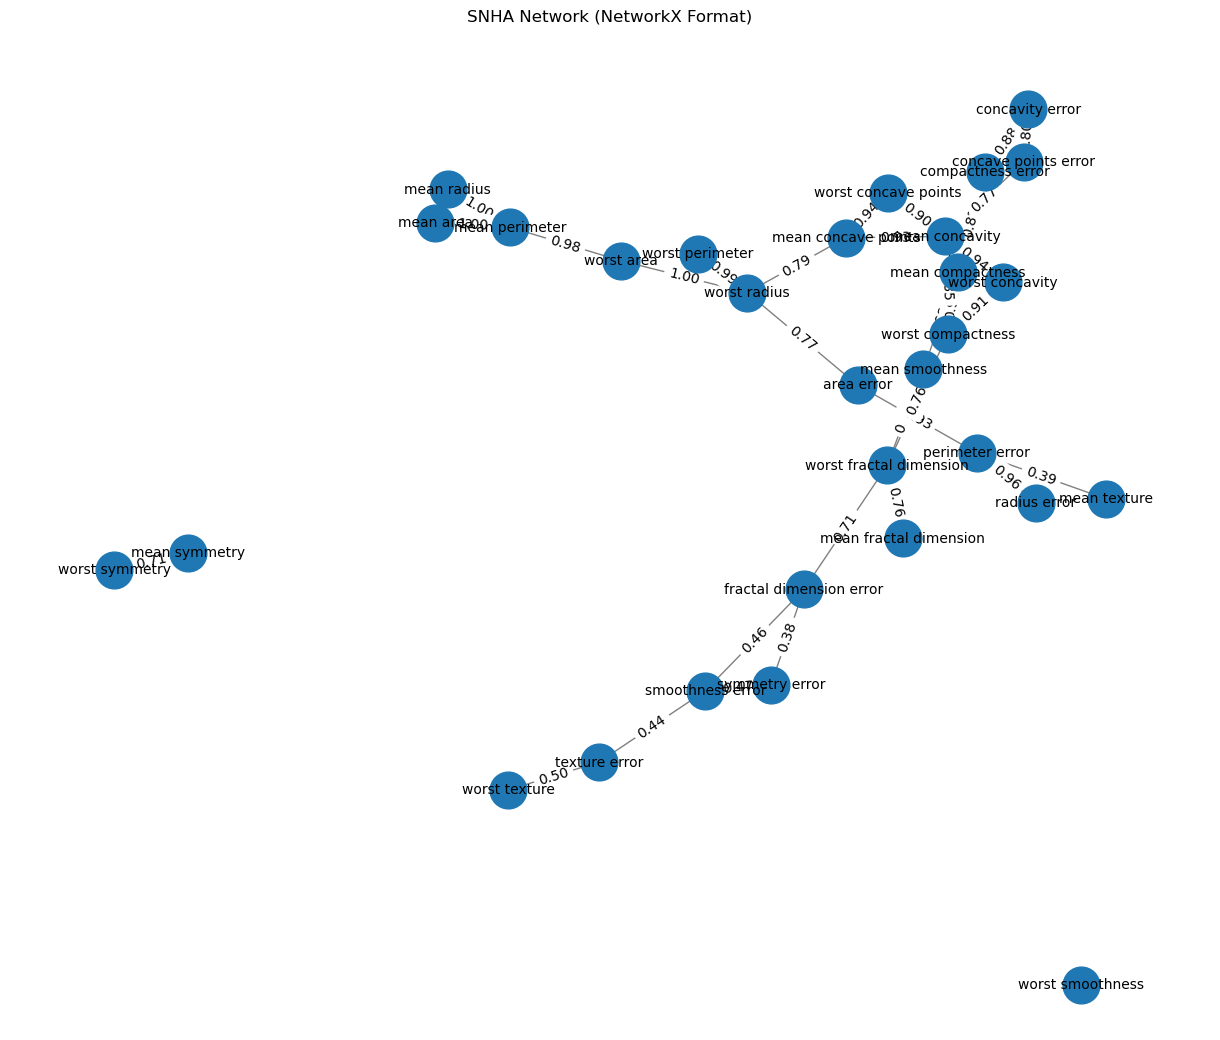

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a NetworkX graph
G = nx.Graph()

# List of feature/column names
features = list(s.data.columns)

# Add nodes
G.add_nodes_from(features)

# Add edges based on predicted adjacency matrix
for i in range(len(features)):
    for j in range(i + 1, len(features)):  # Avoid duplicates
        if s.graph_pred[i, j]:  # If there is an edge
            weight = abs(s.corr.iloc[i, j])  # Corrected indexing
            G.add_edge(features[i], features[j], weight=weight)

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Optional: visualize the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10, edge_color='gray')

# Edge weights
edge_weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_weights.items()})

plt.title("SNHA Network (NetworkX Format)")
plt.show()

In [6]:
degree_centrality = nx.degree_centrality(G)
central_node = max(degree_centrality, key=degree_centrality.get)

print("Top node by Degree Centrality:", central_node)
print("Score:", degree_centrality[central_node])

Top node by Degree Centrality: mean concavity
Score: 0.20689655172413793


In [7]:
betweenness_centrality = nx.betweenness_centrality(G)
central_node_btw = max(betweenness_centrality, key=betweenness_centrality.get)

print("Top node by Betweenness Centrality:", central_node_btw)
print("Score:", betweenness_centrality[central_node_btw])


Top node by Betweenness Centrality: mean concavity
Score: 0.4536124794745484


In [8]:
eigenvector_centrality = nx.eigenvector_centrality(G)
central_node_eigen = max(eigenvector_centrality, key=eigenvector_centrality.get)

print("Top node by Eigenvector Centrality:", central_node_eigen)
print("Score:", eigenvector_centrality[central_node_eigen])

Top node by Eigenvector Centrality: mean concavity
Score: 0.5303561014772642


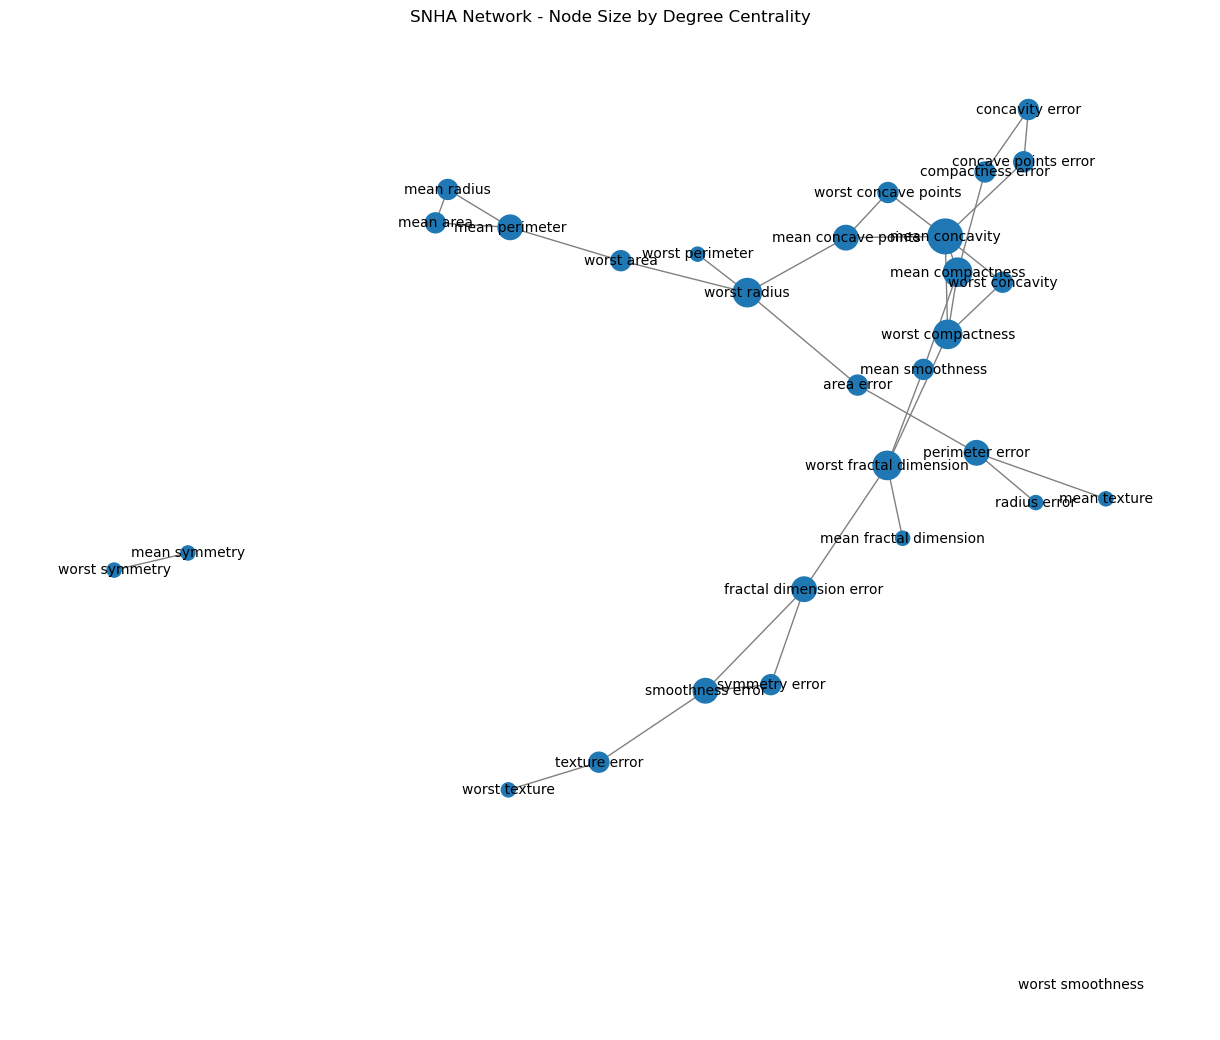

In [9]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

# Use degree centrality for sizing
node_size = [v * 3000 for v in degree_centrality.values()]

nx.draw(G, pos, with_labels=True, node_size=node_size, edge_color='gray', font_size=10)
plt.title("SNHA Network - Node Size by Degree Centrality")
plt.show()